In [2]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
(trainX,trainY), (testX,testY)  = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
trainX = trainX.reshape(trainX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1)
trainX = trainX.astype('float32')
testX = testX.astype('float32')

train_X = trainX/255  ## normalising dataset
test_X = testX/255

In [6]:
print(trainX.shape, trainY.shape,test_X.shape) ##shape of train n test dataset
print(np.unique(trainY))  ##number of categories

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1)
[0 1 2 3 4 5 6 7 8 9]


In [7]:
train_Y = np_utils.to_categorical(trainY)
test_Y = np_utils.to_categorical(testY)

In [8]:
##from test data , taking 90% as validation data and 10% as test images
## test and al data should come from same dataset

x_test, x_val, y_test, y_val = train_test_split(test_X, test_Y, test_size=0.9, random_state=42)

In [9]:
print(test_X.shape, test_Y.shape)

(10000, 28, 28, 1) (10000, 10)


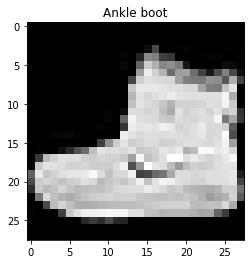

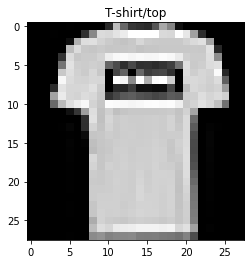

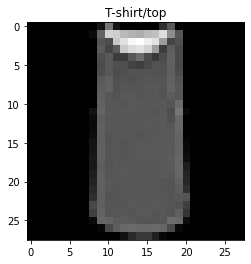

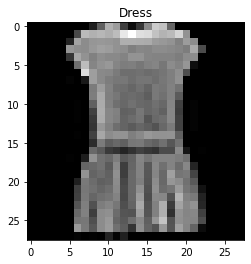

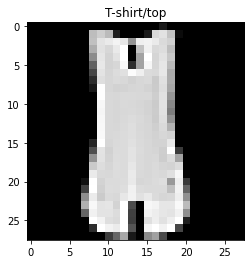

In [10]:
for i in range(5): ## image of first 5 train dataset
  plt.figure(i)
  plt.imshow(trainX[i].reshape(28,28) ,cmap='gray')
  plt.title(class_names[trainY[i]])
  plt.show()

In [11]:
model = Sequential()
model.add(Convolution2D(32,(3,3), activation = 'relu',input_shape = (28,28,1),kernel_initializer = 'he_uniform')) ## he_uniforrm works better for relu activation
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), strides = 2))
model.add(Convolution2D(32,(5,5),activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.3))                                                        ##to reduce overfitting
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [13]:
hist = model.fit(train_X,train_Y, epochs = 10, batch_size = 64, validation_data = (x_val,y_val), shuffle = True , verbose = 1)

Epoch 1/10
938/938 [==============================] - 13s 6ms/step - loss: 0.6320 - accuracy: 0.7739 - val_loss: 0.3268 - val_accuracy: 0.8847
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3068 - accuracy: 0.8886 - val_loss: 0.2683 - val_accuracy: 0.9019
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2563 - accuracy: 0.9074 - val_loss: 0.2561 - val_accuracy: 0.9057
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2099 - accuracy: 0.9229 - val_loss: 0.2469 - val_accuracy: 0.9118
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1904 - accuracy: 0.9302 - val_loss: 0.2243 - val_accuracy: 0.9209
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1690 - accuracy: 0.9370 - val_loss: 0.2181 - val_accuracy: 0.9218
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1554 - accuracy: 0.9420 - val_loss: 0.2181 - val_accuracy: 0.9221
Epoch

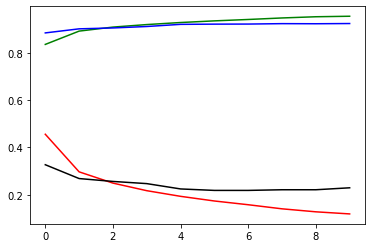

In [14]:
plt.figure(0)
plt.plot(hist.history['accuracy'], 'g')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_accuracy'], 'b')
plt.plot(hist.history['val_loss'], 'black')
plt.show()



some wrong predicted images: Dress


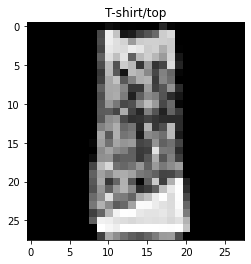

some wrong predicted images: Shirt


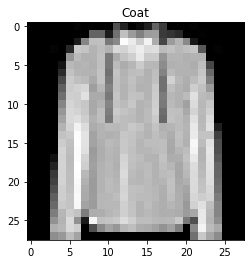

some wrong predicted images: Shirt


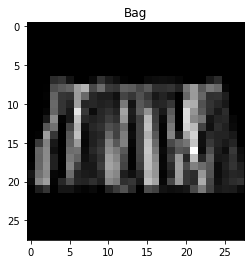

some wrong predicted images: Dress


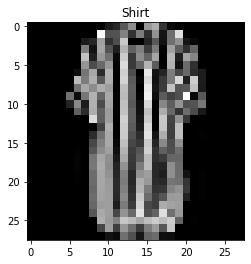

some wrong predicted images: Shirt


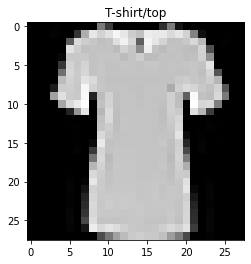

some wrong predicted images: T-shirt/top


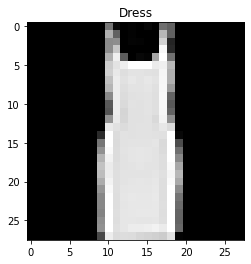

some wrong predicted images: Shirt


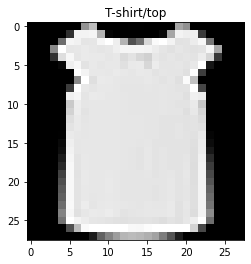

some wrong predicted images: Pullover


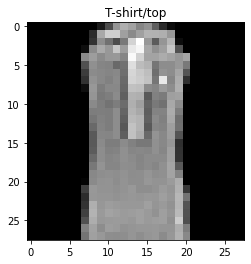

some wrong predicted images: Shirt


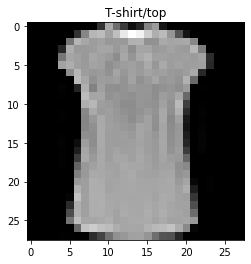

Out of all test images 918 are predicted correct


In [17]:
prediction = model.predict(x_test)
count = 0
for i in range(x_test.shape[0]):
  a = class_names[np.argmax(prediction[i])]
  b = class_names[np.argmax(y_test[i])]
  if a == b:
    count+=1
  
  if a != b and i <= 100:
    print('some wrong predicted images:', b)
    plt.figure(i)
    plt.imshow(x_test[i].reshape(28,28) ,cmap='gray')
    plt.title(a)
    plt.show()
print('Out of all test images', count, 'are predicted correct')


In [18]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.2546 - accuracy: 0.9180


[0.25461339950561523, 0.9179999828338623]

**Model is slightly overfit as train accuray is 95% and test accuracy is 92% which is quite acceptable**